# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 

In [ ]:
# Lectura datos, relación variables, mapas de correlación...

In [ ]:
# Utiliza todas las celdas que necesites...

In [188]:
df = pd.read_csv('data/advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


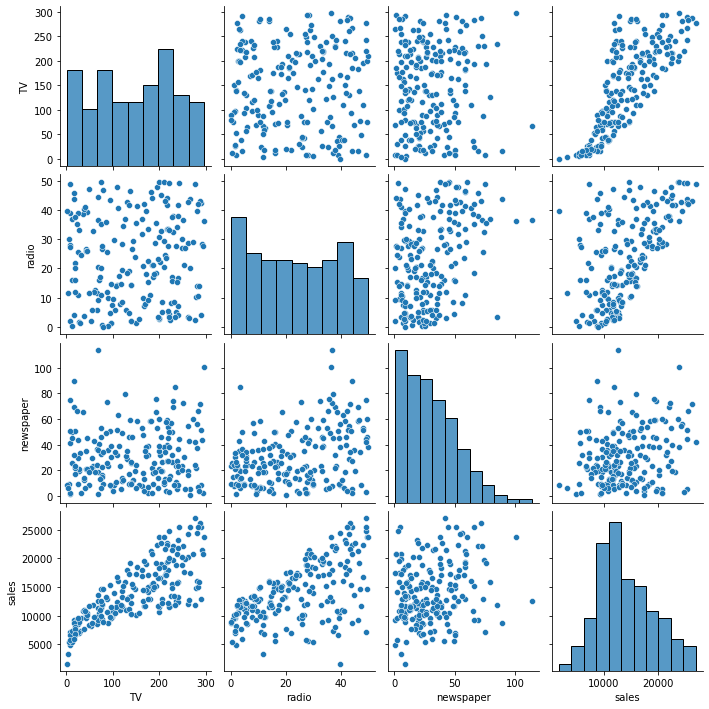

In [6]:
sns.pairplot(df)

<AxesSubplot:>

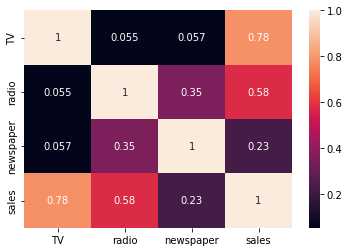

In [7]:
sns.heatmap(df.corr(), annot=True)

## Modelado

In [ ]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [ ]:
# Utiliza todas las celdas que necesites...

In [96]:
X = df[['TV','radio']]
y = df['sales']

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [149]:
lin_reg = LinearRegression()

In [148]:
from sklearn.model_selection import cross_val_score

cross_val_score(lin_reg, X, y, cv=10, scoring='neg_mean_absolute_error')

array([-1370.66137806, -1421.56941611, -1186.08613706, -1394.90204664,
        -886.62966364,  -963.45625525, -1978.7933566 , -1167.74061342,
       -1178.37585161, -1373.68332552])

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160,)
(40,)


In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


In [104]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [105]:
# Modelo 1
lin_reg = LinearRegression()
lin_reg.fit(X_train_scal, y_train)

print(lin_reg.score(X_train_scal, y_train))

y_pred = lin_reg.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.906590009997456
MAE test 1372.3979221023087
MAPE test 0.24647430757847993
MSE test 4391429.76358188
RMSE test 2095.5738506628395


In [124]:
# Modelo 2
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train_scal, y_train)

print(ridge_reg.score(X_train_scal, y_train))

y_pred = ridge_reg.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.902505654573031
MAE test 1357.812559654479
MAPE test 0.24351099426806538
MSE test 4581028.736837966
RMSE test 2140.333790986342


In [119]:
n_alphas = 100
alphas = np.logspace(-4, 2, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scal, y_train)
    
    # coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test_scal)
    ridge_error = mean_absolute_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    # baseline.append(baseline_error)

In [120]:
err_ridge.index(np.min(err_ridge))

84

In [123]:
alphas[84]

12.32846739442066

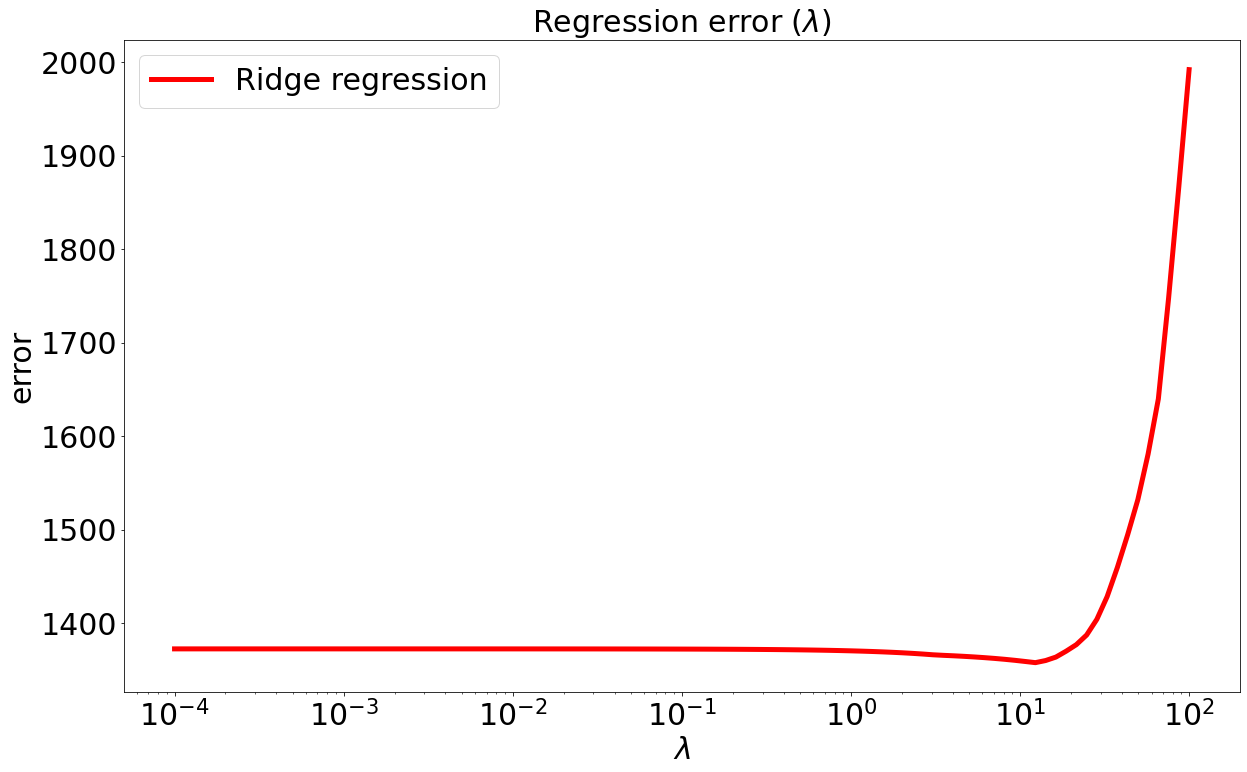

In [122]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
# ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [135]:
# Modelo 3
lasso_reg = Lasso(alpha=200)
lasso_reg.fit(X_train_scal, y_train)

print(lasso_reg.score(X_train_scal, y_train))

y_pred = lasso_reg.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.903620022423816
MAE test 1356.8230117203602
MAPE test 0.24225831205418968
MSE test 4480516.638522758
RMSE test 2116.7230897126715


In [132]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

err_lasso = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scal, y_train)
    
    y_pred = lasso.predict(X_test_scal)
    lasso_error = mean_absolute_error(y_pred, y_test)
    err_lasso.append(lasso_error)


In [133]:
alphas[err_lasso.index(np.min(err_lasso))]

231.01297000831582

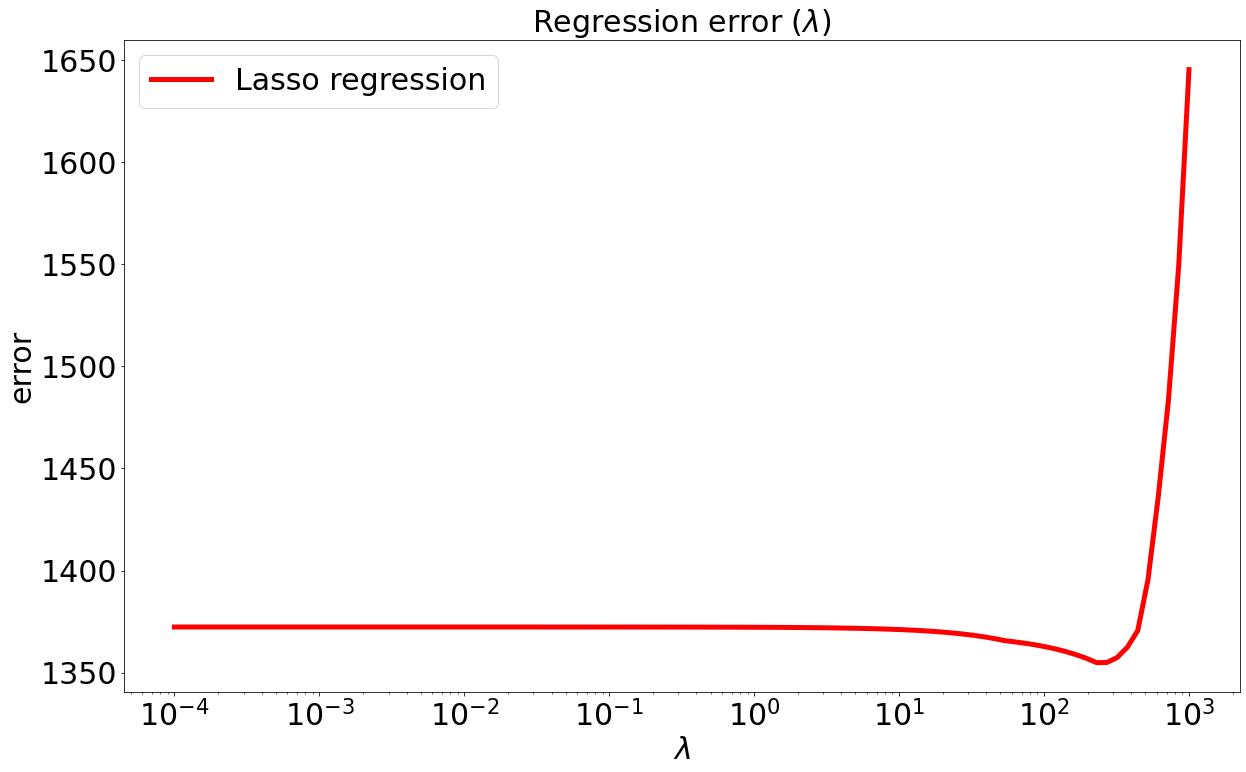

In [134]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso regression")
# ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [144]:
# Modelo 4
elastic = ElasticNet(alpha= 0.01, l1_ratio=0.95)

elastic.fit(X_train_scal, y_train)

print(elastic.score(X_train_scal, y_train))

y_pred = elastic.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.9065897993247244
MAE test 1372.228429111628
MAPE test 0.24644685345247633
MSE test 4391920.604482635
RMSE test 2095.6909611110686


In [138]:
from sklearn.model_selection import GridSearchCV

parameters = {"alpha": np.logspace(-2,5,50),
              "l1_ratio": np.arange(0,1,0.05)}

elastic_gs = GridSearchCV(elastic, parameters, cv=5, scoring="neg_mean_absolute_error")

elastic_gs.fit(X_train_scal, y_train)

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.813e+08, tolerance: 3.547e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+08, tolerance: 3.161e+05 Linear regression models with null weight for the l1 regu

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-02, 1.38949549e-02, 1.93069773e-02, 2.68269580e-02,
       3.72759372e-02, 5.17947468e-02, 7.19685673e-02, 1.00000000e-01,
       1.38949549e-01, 1.93069773e-01, 2.68269580e-01, 3.72759372e-01,
       5.17947468e-01, 7.19685673e-01, 1.00000000e+00, 1.38949549e+00,
       1.93069773e+00, 2.68269580e+00, 3.72759372e+...
       1.38949549e+03, 1.93069773e+03, 2.68269580e+03, 3.72759372e+03,
       5.17947468e+03, 7.19685673e+03, 1.00000000e+04, 1.38949549e+04,
       1.93069773e+04, 2.68269580e+04, 3.72759372e+04, 5.17947468e+04,
       7.19685673e+04, 1.00000000e+05]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_absolute_error')

In [139]:
elastic_gs.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9500000000000001}

In [140]:
elastic_gs.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=0.9500000000000001)

In [141]:
elastic_gs.best_score_

-1241.8093316557884

In [151]:
# Modelo 5

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

pol_reg_2 = LinearRegression()
pol_reg_2.fit(X_poly_train, y_train)

print(pol_reg_2.score(X_poly_train, y_train))

y_pred = pol_reg_2.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.9901208013504648
MAE test 500.37577911722576
MAPE test 0.11660105094520926
MSE test 911572.5062967513
RMSE test 954.7630629097207


In [152]:
# Modelo 6

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

pol_reg_3 = LinearRegression()
pol_reg_3.fit(X_poly_train, y_train)

print(pol_reg_3.score(X_poly_train, y_train))

y_pred = pol_reg_3.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.9942326905996601
MAE test 426.50569050589945
MAPE test 0.10110088790462506
MSE test 692359.3077086123
RMSE test 832.0813107555128


In [153]:
# Modelo 7

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

pol_reg_4 = LinearRegression()
pol_reg_4.fit(X_poly_train, y_train)

print(pol_reg_4.score(X_poly_train, y_train))

y_pred = pol_reg_4.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.9956885238597095
MAE test 395.47852738999546
MAPE test 0.09199765822875264
MSE test 576324.6962702475
RMSE test 759.1605207531853


In [155]:
# Modelo 8

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

pol_reg_5 = LinearRegression()
pol_reg_5.fit(X_poly_train, y_train)

print(pol_reg_5.score(X_poly_train, y_train))

y_pred = pol_reg_5.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.9964120449525693
MAE test 367.10780965100776
MAPE test 0.08832240371653396
MSE test 532538.3807201558
RMSE test 729.7522735285967


In [156]:
# Modelo 9

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

pol_reg_6 = LinearRegression()
pol_reg_6.fit(X_poly_train, y_train)

print(pol_reg_6.score(X_poly_train, y_train))

y_pred = pol_reg_6.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.9793893861627718
MAE test 627.55
MAPE test 0.08951431580938969
MSE test 767949.1000000002
RMSE test 876.3270508206398


In [165]:
# Modelo 10

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

pol_reg_5 = Lasso(alpha=50)
pol_reg_5.fit(X_poly_train, y_train)

print(pol_reg_5.score(X_poly_train, y_train))

y_pred = pol_reg_5.predict(X_poly_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MAPE test", mean_absolute_percentage_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))
print("RMSE test", np.sqrt(mean_squared_error(y_test, y_pred)))

0.9952733250825712
MAE test 348.93554688050654
MAPE test 0.08138722312481354
MSE test 456129.50703116757
RMSE test 675.3736055185808


## Resultados

In [ ]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

In [ ]:
# Utiliza todas las celdas que necesites...

# Modelos entrenados:
1. Regresión lineal . MAE = ...
2. LR + Ridge
3. LR + Lasso
4. LR + Elastic
5. PR 2
6. PR 3
7. PR 4
8. PR 5
9. PR 6
10. El mejor modelo (PR 5) + Lasso. El modelo con menores errores en test, es decir, el que mejor generaliza ante nuevos datos.

In [179]:
presupuesto = pd.DataFrame({"TV":[90], "Radio":[90]})
presupuesto

,TV,Radio
0,90,90


In [180]:
presupuesto_scal = scaler.transform(presupuesto.values)
presupuesto_poly = poly_reg.transform(presupuesto_scal)
presupuesto_poly

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.00000000e+00, -7.14571723e-01,  4.53446856e+00,
         5.10612748e-01, -3.24020301e+00,  2.05614051e+01,
        -3.64869431e-01,  2.31535745e+00, -1.46925987e+01,
         9.32350448e+01,  2.60725378e-01, -1.65448896e+00,
         1.04989155e+01, -6.66231266e+01,  4.22771379e+02,
        -1.86306983e-01,  1.18225103e+00, -7.50222817e+00,
         4.76070024e+01, -3.02100473e+02,  1.91704352e+03]])

In [181]:
pol_reg_5.predict(presupuesto_poly)

array([19737.60164176])

In [185]:
len(pol_reg_5.coef_)

21

In [187]:
posibles_presupuestos = [(100,0),(150,0),(200,0)]
ventas = []

for presupuesto in posibles_presupuestos:
    df_pres = pd.DataFrame({"TV":[presupuesto[0]], "Radio":[presupuesto[1]]})
    presupuesto_scal = scaler.transform(df_pres.values)
    presupuesto_poly = poly_reg.transform(presupuesto_scal)
    ventas.append(pol_reg_5.predict(presupuesto_poly))

ventas


c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


[array([9432.92218645]), array([10010.91060818]), array([10522.49043952])]